In [10]:
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [3]:
PG = wb.DataReader("PG",data_source="yahoo", start="1995-1-1")
PG

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.625000,15.437500,15.468750,15.593750,3318400.0,8.166473
1995-01-04,15.656250,15.312500,15.531250,15.468750,2218800.0,8.101009
1995-01-05,15.437500,15.218750,15.375000,15.250000,2319600.0,7.986450
1995-01-06,15.406250,15.156250,15.156250,15.281250,3438000.0,8.002816
1995-01-09,15.406250,15.187500,15.343750,15.218750,1795200.0,7.970086
...,...,...,...,...,...,...
2021-01-28,131.649994,127.440002,127.839996,130.360001,8242000.0,130.360001
2021-01-29,130.289993,128.070007,130.190002,128.210007,8343200.0,128.210007
2021-02-01,129.660004,128.199997,129.000000,128.970001,6534200.0,128.970001


# Simple Rate of return

$$
R = \frac{P_1-P_0} {P_0} = \frac{P_1}{P_0} - 1
$$

In [4]:
PG.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,8.166473
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,8.101009
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,7.986450
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,8.002816
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,7.970086


In [5]:
PG["simple_return"]=PG["Adj Close"]/PG["Adj Close"].shift(1) - 1

In [6]:
PG.head(5)

,High,Low,Open,Close,Volume,Adj Close,simple_return
Date,,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,8.166473,NaN
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,8.101009,-0.008016
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,7.986450,-0.014141
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,8.002816,0.002049
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,7.970086,-0.004090


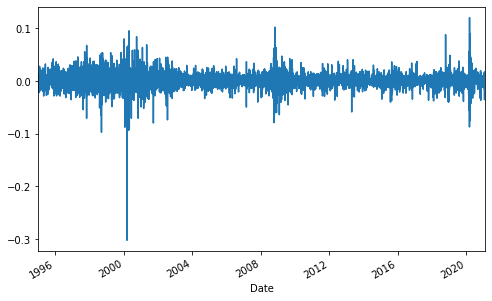

In [14]:
PG["simple_return"].plot(figsize=(8,5))
plt.show()

In [17]:
average_return_daily=PG["simple_return"].mean()
average_return_daily

0.0005225100875722508

In [18]:
average_return_annually=PG["simple_return"].mean()*250

In [26]:
str(round(average_return_annually*100,5))+"%"

'13.06275%'